Importing Libraries and Loading Data

In [17]:
import pandas as pd
import numpy as np

# Load cleaned datasets
nvidia_df = pd.read_csv("../data/nvidia_stock.csv")
microsoft_df = pd.read_csv("../data/microsoft_stock.csv")
apple_df = pd.read_csv("../data/apple_stock.csv")

# Convert Date column to datetime
nvidia_df["Date"] = pd.to_datetime(nvidia_df["Date"])
microsoft_df["Date"] = pd.to_datetime(microsoft_df["Date"])
apple_df["Date"] = pd.to_datetime(apple_df["Date"])

# Sort by date (ensuring chronological order)
nvidia_df = nvidia_df.sort_values(by="Date")
microsoft_df = microsoft_df.sort_values(by="Date")
apple_df = apple_df.sort_values(by="Date")

Next we generate moving averages with a 20, 50 and 200 day window

In [18]:
def add_moving_averages(df, window_sizes=[20, 50, 200]):
    for window in window_sizes:
        df[f"SMA_{window}"] = df["Close"].rolling(window=window).mean()
        df[f"EMA_{window}"] = df["Close"].ewm(span=window, adjust=False).mean()
    return df

# Apply moving averages to all datasets
nvidia_df = add_moving_averages(nvidia_df)
microsoft_df = add_moving_averages(microsoft_df)
apple_df = add_moving_averages(apple_df)

We make a new feature `Future Return` as the percentage change in stock price over the next 5 days.

In [19]:
def add_future_return(df, days=5):
    df[f"Future_Return_{days}d"] = df["Close"].pct_change(periods=days).shift(-days)
    return df

# Apply future return calculation
nvidia_df = add_future_return(nvidia_df)
microsoft_df = add_future_return(microsoft_df)
apple_df = add_future_return(apple_df)

Finally we asses the correlation of our additional features

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute correlation with the future return
def correlation_analysis(df):
    corr_matrix = df.corr()
    print(corr_matrix["Future_Return_5d"].sort_values(ascending=False))

Computing correlation of SMA, EMA

In [21]:
print("NVIDIA Feature Correlations:")
correlation_analysis(nvidia_df)

NVIDIA Feature Correlations:
Future_Return_5d    1.000000
EMA_200             0.011318
SMA_50              0.011226
SMA_200             0.011036
EMA_50              0.010959
SMA_20              0.010769
EMA_20              0.010485
Open                0.009818
High                0.009694
Low                 0.009688
Close               0.009535
Date                0.004936
Volume             -0.043961
Name: Future_Return_5d, dtype: float64


In [22]:
print("\nMicrosoft Feature Correlations:")
correlation_analysis(microsoft_df)


Microsoft Feature Correlations:
Future_Return_5d    1.000000
Volume              0.005771
SMA_200            -0.020060
SMA_50             -0.021398
EMA_200            -0.021971
EMA_50             -0.022285
EMA_20             -0.023044
SMA_20             -0.023101
Open               -0.023774
High               -0.023961
Low                -0.024025
Close              -0.024291
Date               -0.048314
Name: Future_Return_5d, dtype: float64


In [23]:
print("\nApple Feature Correlations:")
correlation_analysis(apple_df)


Apple Feature Correlations:
Future_Return_5d    1.000000
Date                0.012529
Volume             -0.002265
EMA_200            -0.005299
SMA_20             -0.006421
EMA_50             -0.006481
SMA_50             -0.006735
Low                -0.006816
EMA_20             -0.006846
High               -0.006880
Close              -0.006894
Open               -0.006894
SMA_200            -0.007434
Name: Future_Return_5d, dtype: float64


It's not necessary for model performance but just to validate wether our moving averages capture meanigful trends, we can plot them before finalizaing the feature set.

In [24]:
def plot_moving_averages(df, stock_name):
    plt.figure(figsize=(12,6))
    plt.plot(df["Date"], df["Close"], label="Close Price", color="black", alpha=0.7)
    plt.plot(df["Date"], df["SMA_20"], label="SMA 20", linestyle="dashed", color="blue")
    plt.plot(df["Date"], df["SMA_50"], label="SMA 50", linestyle="dashed", color="green")
    plt.plot(df["Date"], df["SMA_200"], label="SMA 200", linestyle="dashed", color="red")
    plt.xlabel("Year")
    plt.ylabel("Stock Price (USD)")
    plt.title(f"{stock_name} Stock Price vs Moving Averages")
    plt.legend()
    plt.grid()
    plt.show()

Plot for each stock

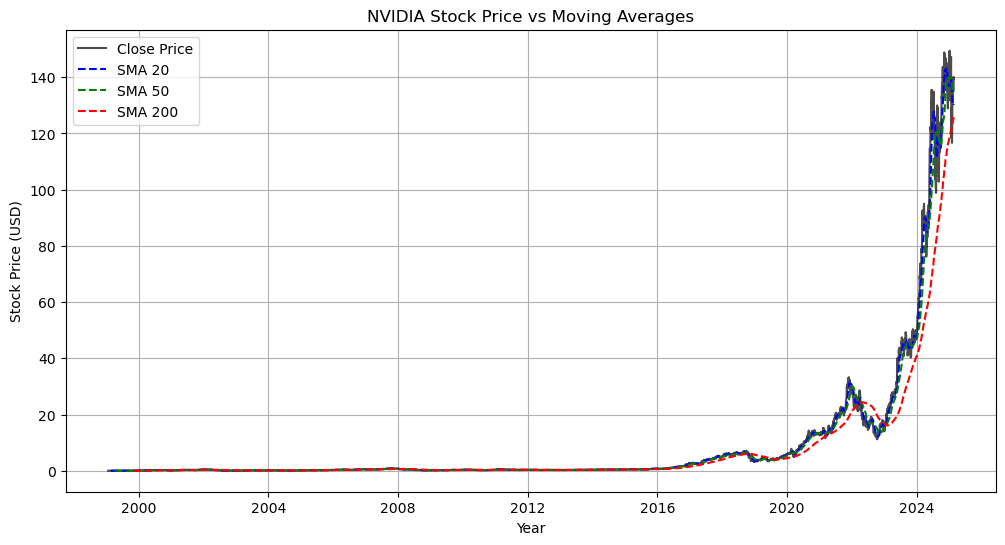

In [25]:
plot_moving_averages(nvidia_df, "NVIDIA")

The NVIDIA stock price vs. moving averages graph shows how short, medium, and long-term trends evolve. The 20-day SMA (blue) closely follows the closing price, reacting quickly to price movements, while the 50-day SMA (green) smooths out short-term fluctuations. The 200-day SMA (red) lags significantly but confirms the long-term trend. The stock's sharp rise post-2020 has pulled all SMAs upward, reinforcing a strong bullish trend. Crossovers between these SMAs, especially when the 50-day crosses the 200-day, can indicate potential buy or sell signals. This suggests moving averages could be useful for trend-based predictive modeling.

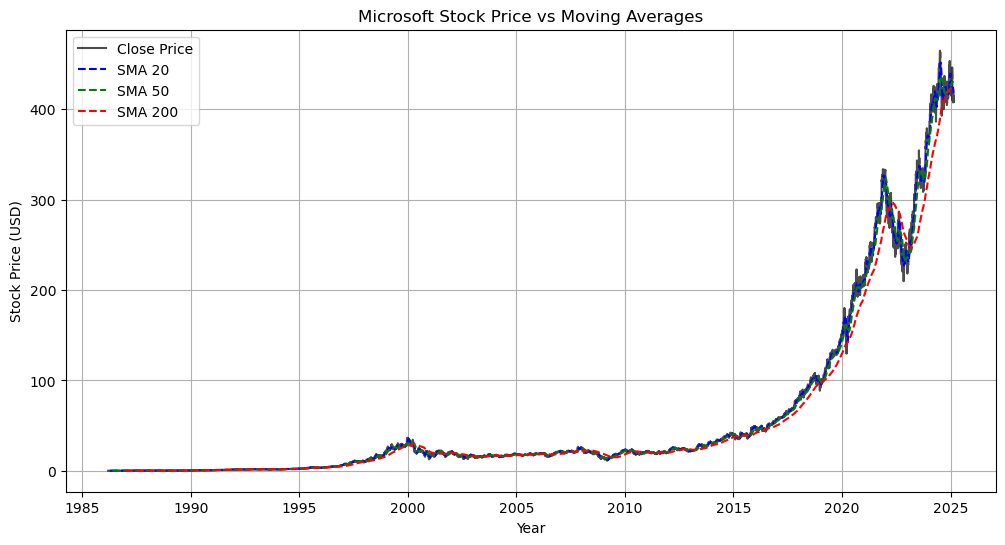

In [26]:
plot_moving_averages(microsoft_df, "Microsoft")

The Microsoft stock price vs. moving averages graph highlights the stock’s long-term growth. The 20-day SMA (blue) closely follows the price, responding quickly to fluctuations, while the 50-day SMA (green) smooths out short-term trends. The 200-day SMA (red) lags behind but confirms the broader uptrend. The stock’s sharp rise post-2020 is reflected in all SMAs trending upward, indicating strong momentum. Moving average crossovers, especially when shorter SMAs move above the 200-day SMA, can signal bullish trends, making these indicators valuable for trend-based forecasting.

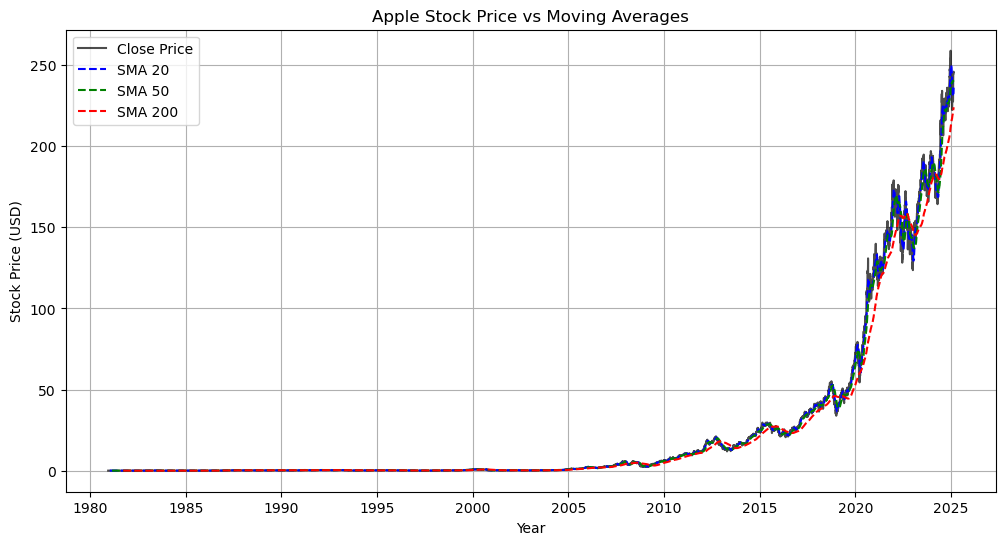

In [27]:
plot_moving_averages(apple_df, "Apple")

The Apple stock price vs. moving averages graph shows the stock’s long-term growth with significant price acceleration after 2020. The 20-day SMA (blue) reacts quickly to price changes, closely following the stock, while the 50-day SMA (green) smooths out short-term fluctuations. The 200-day SMA (red) lags but confirms the overall bullish trend. The upward movement of all SMAs indicates strong momentum, with shorter SMAs frequently crossing above the 200-day SMA, signaling bullish trends. This suggests that moving averages can be useful for trend-based trading strategies and predictive modeling.

In [28]:
# Save final processed datasets

nvidia_df.to_csv("../data/nvidia_stock_features_selected.csv", index=False)
microsoft_df.to_csv("../data/microsoft_stock_features_selected.csv", index=False)
apple_df.to_csv("../data/apple_stock_features_selected.csv", index=False)

print("Final feature-engineered datasets saved.")

Final feature-engineered datasets saved.
